# Lecture 5: Linear Regression Recap and Intro to Classification

In the previous lecture, we used the example of **linear regression**. In this lecture, we will review the loss function for linear regression as well as look at residual analysis and how to detect and then rectify **heteroscedasticity**. We will also look the alternative of **polynomial regression** for when the data is not linear. In data science, it is essential to distinguish the type of problems we are solving. So far in this course, we have learned some **regression** techniques. We will now proceed to exploring methods to solve **classification** problems.

* __Regression__ - predicting a numeric value based on other values that are influence it in some way.
* __Classification__ - assigning a discrete "class" to a data point (for example, either Red or Blue) based on attributes of the data point.

In the next lecture, we will build upon the types of classifiers even more. 


## Loss Function

A good model will minimize the **loss function**, which is a measure of the difference between the model's prediction and the actual answer. The loss function for linear regression is the least squares error. To compute the total error associated with a simple linear regression model given some existing data points, we use the following process:

* Start with total error = 0.
* For each $x$ value, we compute what the predicted value of $y$ (which we've been referring to as $\hat{y}$) should be given our model. 
* We then compute the distance from this value to the actual value of $y$ at this value of $x$. We use the square of the Euclidean distance formula to calculate this distance ($(\sqrt{(y - \hat{y})^2})^2 = (y - \hat{y})^2$).
* Add this distance to the total error.

For example, suppose we had the single data point (5, 6). If our model is represented by the linear equation $y = 3 + 2x$, then our total error would be $(6 - (3 + 2(5)))^2 = 49$. This method of using Euclidean distance to compute total error is called __least-squares error__ (or __sum of squared error__). For our dataset, we will be using **root mean sqared error** which normalizes the error by the number of data points. The formula version of this, given that we have $n$ data points, is:

$$\sqrt{\frac{\sum_{j = 1}^{n} (y_j - \hat{y})^2}{n}}$$

For those of you who are proficient in calculus, here is a link to an explanation on how to do simple linear regression using differentiation: https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf

### Using Python

Now it's time to create a full linear regression model using Python. We're going to go over how to create the "line of best fit" mentioned earlier in detail.

We start by creating a variable representing our model. We'll call this variable `reg`. To create this model we can use R's `LinearRegression` and `fit` functions.

Execute the statement below and observe the output.

In [1]:
import openml
apikey = 'a821c11980ba2c2b0ab578c51ed3ab66'
openml.config.apikey = apikey

import numpy as np
import pandas as pd
dataset_id = 61
dataset = openml.datasets.get_dataset(dataset_id)
X, cols = dataset.get_data(return_attribute_names=True)
data = pd.DataFrame(X, columns = cols)
print(data.head())
print

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
independent_var = ['sepallength']
dependent_var = ['sepalwidth']
reg.fit(data[independent_var], data[dependent_var])
prediction = reg.predict(data[independent_var])
data['prediction'] = prediction
data['residuals'] = data['sepalwidth'] - data['prediction']
print(data.head())

RMSE = np.sqrt(mean_squared_error(y_true = data['class'], y_pred = data['prediction']))
print
print(RMSE)

   sepallength  sepalwidth  petallength  petalwidth  class
0          5.1         3.5          1.4         0.2    0.0
1          4.9         3.0          1.4         0.2    0.0
2          4.7         3.2          1.3         0.2    0.0
3          4.6         3.1          1.5         0.2    0.0
4          5.0         3.6          1.4         0.2    0.0

   sepallength  sepalwidth  petallength  petalwidth  class  prediction  \
0          5.1         3.5          1.4         0.2    0.0    3.096570   
1          4.9         3.0          1.4         0.2    0.0    3.108023   
2          4.7         3.2          1.3         0.2    0.0    3.119477   
3          4.6         3.1          1.5         0.2    0.0    3.125204   
4          5.0         3.6          1.4         0.2    0.0    3.102296   

   residuals  
0   0.403430  
1  -0.108023  
2   0.080523  
3  -0.025204  
4   0.497704  

2.22445858001


## Heteroscedasticity

One of the assumptions required for linear regression is the errors have constant variance. This assumption is often violated when the variance of errors increases as data values increase (for example, on a plot of income vs. age, the variance of error in income could increase with age). This occurs when the model misses an underlying pattern. 

### Detecting Heteroscedasticity

Heteroscedasticity is detected after a model is made by looking at a plot of the residuals vs the fitted model. If a random scatterplot appears, then the model has contant variance. If a pattern appears (usually a cone shape), then the model is heteroscedastic.

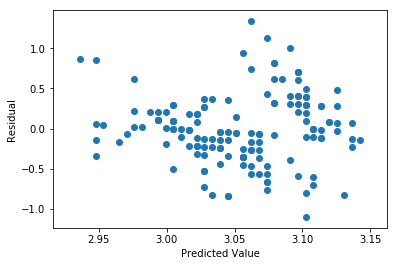

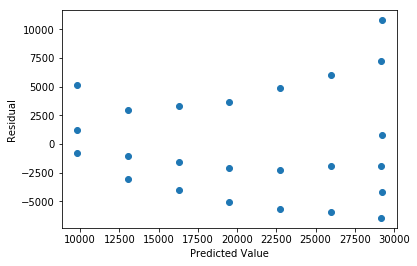

In [2]:
# Using the same model as above, we can see there is constant variance
plt.scatter(data['prediction'],data['residuals'])
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()

# Here is an example of car depreciation
# Since the scatterplot has the cone shape, the model is heteroscedastic
data2 = pd.DataFrame({'price' : pd.Series([25000,22750,20050,17050,14500,12250,10000,9000,40000,36400,32000,27600,23200,19600,16000,15000,30000,27300,24100,20500,17400,14700,12000,11000]),
         'age' : pd.Series([0,0.01,1,2,3,4,5,6,0,0.01,1,2,3,4,5,6,0,0.01,1,2,3,4,5,6])})
reg2 = LinearRegression()
independent_var2 = ['age']
dependent_var2 = ['price']
reg2.fit(data2[independent_var2], data2[dependent_var2])
prediction2 = reg2.predict(data2[independent_var2])
data2['prediction'] = prediction2
data2['residuals'] = data2['price'] - data2['prediction']
plt.scatter(data2['prediction'],data2['residuals'])
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()

Another method is through a statistical test. Two such tests are the Breush Pagan Test and the NCV Test. Following traditional statics tests, the null hypothesis is the variance of residuals is constant. If the p-value is less than the significance threshold of 0.05, then the null hypothesis is rejected and the residuals are not constant.

### Rectifying Heteroscedasticity

A **Box Cox Transform** is a method to normalize the residuals by outputting the option that best matches a normal curve. 

     age     price
0   1.00  0.655070
1   1.01  0.415202
2   2.00  0.096909
3   3.00 -0.306415
4   4.00 -0.703982
5   5.00 -1.111969
6   6.00 -1.595228
7   7.00 -1.842822
8   1.00  1.879836
9   1.01  1.630098
10  2.00  1.292194
11  3.00  0.908806
12  4.00  0.464860
13  5.00  0.040084
14  6.00 -0.463060
15  7.00 -0.621241
16  1.00  1.124321
17  1.01  0.880672
18  2.00  0.561589
19  3.00  0.152580
20  4.00 -0.256157
21  5.00 -0.670577
22  6.00 -1.161455
23  7.00 -1.369316


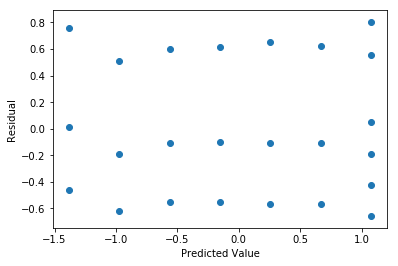

In [3]:
#First we transform the data, then the scatterplot has no pattern
from scipy.stats import boxcox
from sklearn import preprocessing
data3 = pd.DataFrame({'price' : pd.Series([25000,22750,20050,17050,14500,12250,10000,9000,40000,36400,32000,27600,23200,19600,16000,15000,30000,27300,24100,20500,17400,14700,12000,11000]),
                                    'age' : pd.Series([1,1.01,2,3,4,5,6,7,1,1.01,2,3,4,5,6,7,1,1.01,2,3,4,5,6,7])})
data3['price'] = preprocessing.scale(boxcox(data3['price'])[0])
print(data3)

reg3 = LinearRegression()
reg3.fit(data3[independent_var2], data3[dependent_var2])
data3['prediction'] = reg3.predict(data3[independent_var2])
data3['residuals'] = data3['price'] - data3['prediction']
plt.scatter(data3['prediction'],data3['residuals'])
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()

## Polynomial Regression

In order for linear regression to perform as expected, the data must be **linear**. However in many cases, a regression model is ideal, but the prediction is better represented with an equation including $x^2$ or $x^3$. This is when **polynomial regression** is used instead. 

There are several types of regression that may be confused with one another. Logistic regression is used when the variable has two categorical values (like true or false) rather than numerical. Multinomial regression when the variable has more than two categorical values. Polynomial regression is used when the indepedent and dependent variable has a relationship best described with polynomial terms.

## Sources
https://www.r-bloggers.com/how-to-detect-heteroscedasticity-and-rectify-it/

https://www.safaribooksonline.com/library/view/statistics-in-a/9781449361129/ch11.html

https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn